## Exercício Mochila
### Beatriz Haas - MBA Ibmec

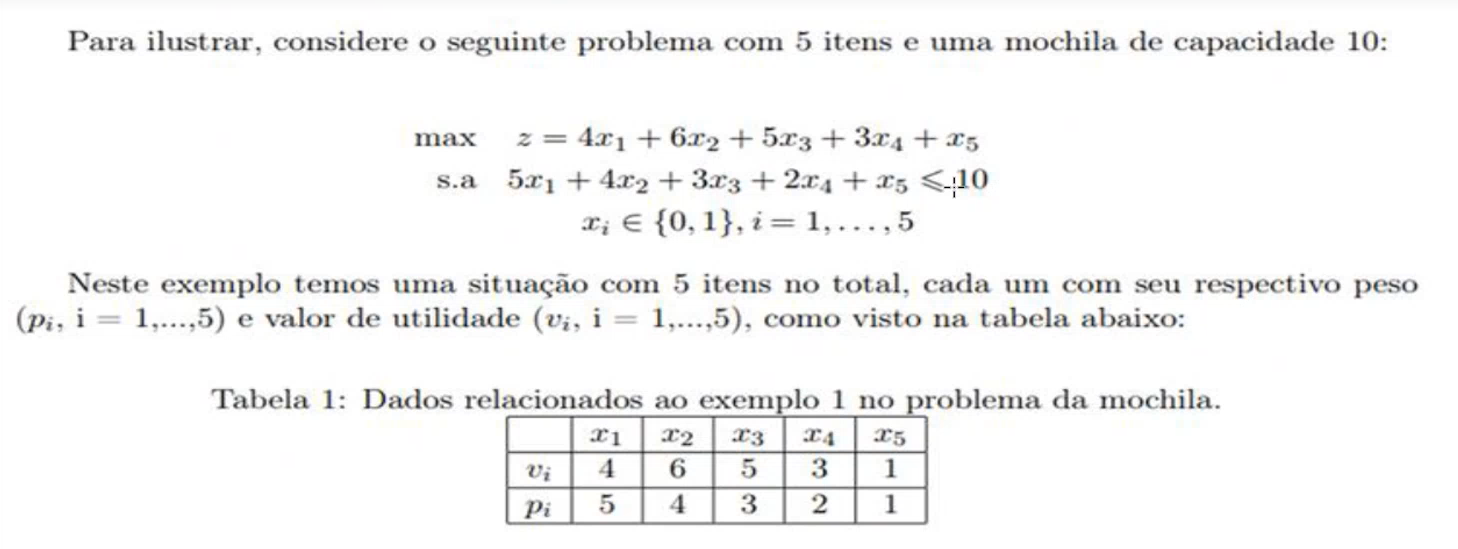

In [2]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 30.8 MB/s eta 0:00:00


In [13]:
from mip import Model, maximize, CBC, INTEGER, OptimizationStatus, BINARY, xsum

In [14]:
coef_funcao_objetivo = [4, 6, 5, 3, 1]
coef_restr = [5, 4, 3, 2, 1]
termo_independente = 10

In [15]:
I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [16]:
x = [m.add_var(var_type=BINARY) for i in I]

In [17]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [20]:
m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print (f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 5 variável(eis), 1 restrição(ões) e 5 zero(s)


In [21]:
status = m.optimize(max_seconds=2)

In [22]:
status == OptimizationStatus.OPTIMAL

True

In [23]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >=0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x2', 'x3', 'x4', 'x5']
